In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import GPT2TokenizerFast
import seaborn as sns

In [2]:
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2") # this is the same tokenizer that openai uses for their instructGPT model family

In [3]:
path_to_data = "./datasets/kleister_charity/dev-0/in.tsv"
path_to_headers = "./datasets/kleister_charity/in-header.tsv"

data = pd.read_csv(path_to_data, sep="\t", header=None)
headers = pd.read_csv(path_to_headers, sep="\t", header=None)
data.columns = headers.iloc[0]
data = data.drop(columns=["text_djvu", "text_tesseract", "text_textract"])
data.iloc[0]["text_best"]

'Trustees’ annual report (including Directors’ report) for the period\\nFrom: 1st August 2017 Period start date To: 31st July 2018 Period end date\\nCharity name: Wormington Village Society\\nCharity registration number: 1155074\\nCompany number:\\nObjectives and activities\\nSORP reference\\nSummary of the purposes of\\nthe charity as set out in its\\ngoverning document\\nPara 1.17\\nThe Village Society provides amenities and\\narranges functions for residents within\\nWormington and surrounding villages. It\\naims to encourage young and old to\\ncontinue their education, offering art,\\nexercise, it and language classes.\\nSummary of the main\\nactivities in relation to those\\npurposes for the public\\nbenefit, in particular, the\\nactivities, projects or services\\nidentified in the accounts.\\nPara 1.17 and\\n1.19\\nCurrently the main activity is fundraising for\\nWormington Village Hall. In December 2017\\nplanning permission for the Village hall was\\ngranted by Tewkesbury Borou

In [4]:
data.head()

,filename,keys,text_best
0,1ada336f29e8247f9f55a8d7e1b1c0da.pdf,address__post_town address__postcode address__...,Trustees’ annual report (including Directors’ ...
1,87ff1046fb88668ed4e0476d66abd733.pdf,address__post_town address__postcode address__...,Havens\nHospices\nCompany number: 2805007\nCha...
2,365a65c22610022110ca8610ecfe4034.pdf,address__post_town address__postcode address__...,ANNUAL REPORT AND\nFINANCIAL STATEMENTS\nFOR T...
3,d07c46323bb61186b6175bad9a274225.pdf,address__post_town address__postcode address__...,THE SANATA CHARITABLE TRUST\nCompany Registrat...
4,a84c1c7a3e570a716f6c61de557b5ff1.pdf,address__post_town address__postcode address__...,Cantate Youth Choir Trustees’ report for 2014\...


In [5]:
len(data)

440

Let's look at the gold keys that we should find in any given document. Although note that some documents don't contain answers to all of the keys, in which case it's correct to simply leave them out.

In [6]:
data.iloc[0]["keys"]

'address__post_town address__postcode address__street_line charity_name charity_number income_annually_in_british_pounds report_date spending_annually_in_british_pounds'

Let's look at how many tokens are in a given document and save it in the dataframe.

In [7]:
data["text_best_number_of_tokens"] = data["text_best"].apply(lambda x: len(tokenizer(x)["input_ids"]))

Token indices sequence length is longer than the specified maximum sequence length for this model (1728 > 1024). Running this sequence through the model will result in indexing errors


In [8]:
data.head()

,filename,keys,text_best,text_best_number_of_tokens
0,1ada336f29e8247f9f55a8d7e1b1c0da.pdf,address__post_town address__postcode address__...,Trustees’ annual report (including Directors’ ...,1728
1,87ff1046fb88668ed4e0476d66abd733.pdf,address__post_town address__postcode address__...,Havens\nHospices\nCompany number: 2805007\nCha...,32898
2,365a65c22610022110ca8610ecfe4034.pdf,address__post_town address__postcode address__...,ANNUAL REPORT AND\nFINANCIAL STATEMENTS\nFOR T...,32864
3,d07c46323bb61186b6175bad9a274225.pdf,address__post_town address__postcode address__...,THE SANATA CHARITABLE TRUST\nCompany Registrat...,4799
4,a84c1c7a3e570a716f6c61de557b5ff1.pdf,address__post_town address__postcode address__...,Cantate Youth Choir Trustees’ report for 2014\...,9898


In [9]:
data["text_best_number_of_tokens"].describe()

count       440.000000
mean      12633.245455
std       13253.844814
min         288.000000
25%        4531.250000
50%        7468.000000
75%       17580.250000
max      109440.000000
Name: text_best_number_of_tokens, dtype: float64

Let's look closer at the distribution of the number of tokens.

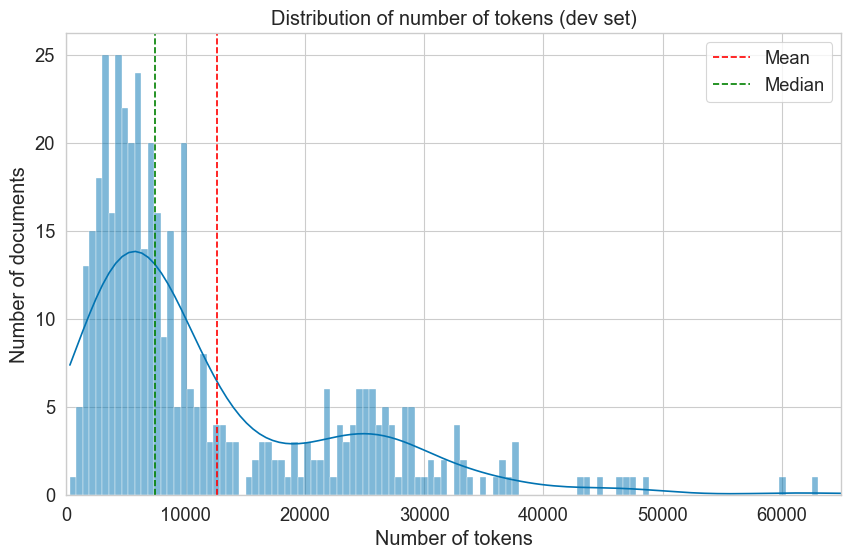

In [10]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x=data["text_best_number_of_tokens"], kde=True, ax=ax, bins=200)
ax.set_title("Distribution of number of tokens (dev set)")
ax.set_xlabel("Number of tokens")
ax.set_ylabel("Number of documents")
ax.axvline(data["text_best_number_of_tokens"].mean(), color="red", linestyle="--", label="Mean")
ax.axvline(data["text_best_number_of_tokens"].median(), color="green", linestyle="--", label="Median")

ax.legend()
ax.set_xlim(0, 65000)

plt.show()
fig.savefig("plots/token_distribution_zoom_dev-0.png", dpi=300)

Let's look at the shortest document to get a better idea of what the input text looks like.

In [11]:
shortest = data[data["text_best"].apply(lambda x: len(tokenizer(x)["input_ids"])) == data["text_best_number_of_tokens"].min()]["text_best"].values[0]
shortest

'LIGHTHOUSE GLOBAL NETWORK\\nCHARITY NO 1163804\\nTRUSTEES REPORT AND FINANCIAL STATEMENT\\nFOR THE PERIOD ENDED\\n31 MAY 2016\\nLIGHTHOUSE GLOBAL NETWORK\\nLEGAL AND ADMINISTRATIVE DETAILS\\nFOR THE PERIOD ENDED 31 MAY 2016\\nTrustees:\\nMr Oluwasegun Julius Eniolu\\nMrs Mary Eniolu\\nMr Samuel Tsaurai Katanda\\nCorrespondence Address:\\n5A Tonbridge Road\\nMaidstone\\nKent\\nME16 8RL\\nCharity Registration No:\\n1163804\\nFor the Period ending 31 May 2016, the Charity was not trading. The Charity started trading on 7\\nSeptember 2016.\\nThe trustees are responsible for keeping proper accounting records which disclose with reasonable accuracy at\\nany time the financial position of the charity at that time and to enable the trustees to ensure that any statement of\\naccount prepared by them. The Trustees will submit Annual Return and Accounts covering the period\\nfrom the trading date of 07 September 2016 to the following accounting date as and when it falls due.\\nSigned on behalf o

We can see that the text contains double escapes for the newline character, i.e. `\\n` instead of `\n`. This also leads to the fact that the string is not represented correctly when printing it.

In [12]:
shortest = shortest.replace("\\n", "\n")
print(shortest)

LIGHTHOUSE GLOBAL NETWORK
CHARITY NO 1163804
TRUSTEES REPORT AND FINANCIAL STATEMENT
FOR THE PERIOD ENDED
31 MAY 2016
LIGHTHOUSE GLOBAL NETWORK
LEGAL AND ADMINISTRATIVE DETAILS
FOR THE PERIOD ENDED 31 MAY 2016
Trustees:
Mr Oluwasegun Julius Eniolu
Mrs Mary Eniolu
Mr Samuel Tsaurai Katanda
Correspondence Address:
5A Tonbridge Road
Maidstone
Kent
ME16 8RL
Charity Registration No:
1163804
For the Period ending 31 May 2016, the Charity was not trading. The Charity started trading on 7
September 2016.
The trustees are responsible for keeping proper accounting records which disclose with reasonable accuracy at
any time the financial position of the charity at that time and to enable the trustees to ensure that any statement of
account prepared by them. The Trustees will submit Annual Return and Accounts covering the period
from the trading date of 07 September 2016 to the following accounting date as and when it falls due.
Signed on behalf of th
es of Lighthouse Global Network
Mary Eniolu
Da

This looks much better. Let's do it for all rows and also for other control characters. Let's also remove redundant spaces.

In [13]:
data["text_best_cleaned"] = data["text_best"].apply(lambda x: x.replace("\\n", "\n").replace("\\t", "\t").replace("\\r", "\r").replace("\\", "").replace("  ", " "))

Let's also save the number of tokens of the cleaned text.

In [14]:
data["text_best_cleaned_number_of_tokens"] = data["text_best_cleaned"].apply(lambda x: len(tokenizer(x)["input_ids"]))

In [15]:
data.head()

,filename,keys,text_best,text_best_number_of_tokens,text_best_cleaned,text_best_cleaned_number_of_tokens
0,1ada336f29e8247f9f55a8d7e1b1c0da.pdf,address__post_town address__postcode address__...,Trustees’ annual report (including Directors’ ...,1728,Trustees’ annual report (including Directors’ ...,1497
1,87ff1046fb88668ed4e0476d66abd733.pdf,address__post_town address__postcode address__...,Havens\nHospices\nCompany number: 2805007\nCha...,32898,Havens\nHospices\nCompany number: 2805007\nCha...,29818
2,365a65c22610022110ca8610ecfe4034.pdf,address__post_town address__postcode address__...,ANNUAL REPORT AND\nFINANCIAL STATEMENTS\nFOR T...,32864,ANNUAL REPORT AND\nFINANCIAL STATEMENTS\nFOR T...,29149
3,d07c46323bb61186b6175bad9a274225.pdf,address__post_town address__postcode address__...,THE SANATA CHARITABLE TRUST\nCompany Registrat...,4799,THE SANATA CHARITABLE TRUST\nCompany Registrat...,4311
4,a84c1c7a3e570a716f6c61de557b5ff1.pdf,address__post_town address__postcode address__...,Cantate Youth Choir Trustees’ report for 2014\...,9898,Cantate Youth Choir Trustees’ report for 2014\...,9040


In [16]:
print(f"Total number of tokens before cleaning: {data['text_best_number_of_tokens'].sum()}")
print(f"Total number of tokens after cleaning: {data['text_best_cleaned_number_of_tokens'].sum()}")

print(f"Percent of tokens that were removed: {100 - (data['text_best_cleaned_number_of_tokens'].sum() / data['text_best_number_of_tokens'].sum()) * 100}")

Total number of tokens before cleaning: 5558628
Total number of tokens after cleaning: 4963088
Percent of tokens that were removed: 10.713794842900086


Let's see how many documents still have a length longer than 4000 tokens after cleaning, which is the maximum number of tokens that the Davinci model from OpenAI can handle as input. Note that there are 609 documents in total.

In [17]:
len(data[data["text_best_cleaned_number_of_tokens"] > 4000])

333

The situation looks even more dire when considering the limitation of GPT-NeoX which has a context length of 2048, meaning the total number of tokens (prompt + generated text) cannot exceed 2048. Assuming we keep about 148 tokens for the output, let's find how many documents are longer than 1900 tokens.

In [18]:
len(data[data["text_best_cleaned_number_of_tokens"] > 1900])

416

In [19]:
data.head()

,filename,keys,text_best,text_best_number_of_tokens,text_best_cleaned,text_best_cleaned_number_of_tokens
0,1ada336f29e8247f9f55a8d7e1b1c0da.pdf,address__post_town address__postcode address__...,Trustees’ annual report (including Directors’ ...,1728,Trustees’ annual report (including Directors’ ...,1497
1,87ff1046fb88668ed4e0476d66abd733.pdf,address__post_town address__postcode address__...,Havens\nHospices\nCompany number: 2805007\nCha...,32898,Havens\nHospices\nCompany number: 2805007\nCha...,29818
2,365a65c22610022110ca8610ecfe4034.pdf,address__post_town address__postcode address__...,ANNUAL REPORT AND\nFINANCIAL STATEMENTS\nFOR T...,32864,ANNUAL REPORT AND\nFINANCIAL STATEMENTS\nFOR T...,29149
3,d07c46323bb61186b6175bad9a274225.pdf,address__post_town address__postcode address__...,THE SANATA CHARITABLE TRUST\nCompany Registrat...,4799,THE SANATA CHARITABLE TRUST\nCompany Registrat...,4311
4,a84c1c7a3e570a716f6c61de557b5ff1.pdf,address__post_town address__postcode address__...,Cantate Youth Choir Trustees’ report for 2014\...,9898,Cantate Youth Choir Trustees’ report for 2014\...,9040


In [20]:
data.to_csv("./datasets/kleister_charity/dev-0/in_extended.tsv", sep="\t", index=False)

In [21]:
# sort data by text_best_cleaned_number_of_tokens (ascending)
data = data.sort_values(by="text_best_cleaned_number_of_tokens", ascending=True)
data.head()

,filename,keys,text_best,text_best_number_of_tokens,text_best_cleaned,text_best_cleaned_number_of_tokens
100,f348cae2e6348821995eeece5f8e9e78.pdf,address__post_town address__postcode address__...,LIGHTHOUSE GLOBAL NETWORK\nCHARITY NO 1163804\...,288,LIGHTHOUSE GLOBAL NETWORK\nCHARITY NO 1163804\...,264
204,739a949f270ce086a67caf4b883f7128.pdf,address__post_town address__postcode address__...,~\nComposition and Structure of the Management...,1112,~\nComposition and Structure of the Management...,954
232,bcd1190e3466f2c2b3d6353e1577ce11.pdf,address__post_town address__postcode address__...,INCOME\nDonations\n615.35\nTop ups\n2651.12\nG...,1131,INCOME\nDonations\n615.35\nTop ups\n2651.12\nG...,1026
323,f9db3a1216d00fa9c594c33ddcaf9bfc.pdf,address__post_town address__postcode address__...,LIGHTHOUSE GLOBAL NETWORK\nCHARITY NO 1163804\...,1135,LIGHTHOUSE GLOBAL NETWORK\nCHARITY NO 1163804\...,1034
358,1989c371886aea0f19b02d4eba507e25.pdf,address__post_town address__postcode address__...,UNAUDITED FINANCIAL STATEMENTS\nFOR THE YEAR E...,1375,UNAUDITED FINANCIAL STATEMENTS\nFOR THE YEAR E...,1147


In [22]:
# get text_best_cleaned of the shortest document
shortest = data.iloc[0]["text_best_cleaned"]
print(shortest)

LIGHTHOUSE GLOBAL NETWORK
CHARITY NO 1163804
TRUSTEES REPORT AND FINANCIAL STATEMENT
FOR THE PERIOD ENDED
31 MAY 2016
LIGHTHOUSE GLOBAL NETWORK
LEGAL AND ADMINISTRATIVE DETAILS
FOR THE PERIOD ENDED 31 MAY 2016
Trustees:
Mr Oluwasegun Julius Eniolu
Mrs Mary Eniolu
Mr Samuel Tsaurai Katanda
Correspondence Address:
5A Tonbridge Road
Maidstone
Kent
ME16 8RL
Charity Registration No:
1163804
For the Period ending 31 May 2016, the Charity was not trading. The Charity started trading on 7
September 2016.
The trustees are responsible for keeping proper accounting records which disclose with reasonable accuracy at
any time the financial position of the charity at that time and to enable the trustees to ensure that any statement of
account prepared by them. The Trustees will submit Annual Return and Accounts covering the period
from the trading date of 07 September 2016 to the following accounting date as and when it falls due.
Signed on behalf of th
es of Lighthouse Global Network
Mary Eniolu
Da